# Question 3

## Dataset

### import

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1UM3PJ3t2pVPJytUeT-rhKqHvBKREx-jp


  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1UM3PJ3t2pVPJytUeT-rhKqHvBKREx-jp
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 77.3MB/s]


### Dataframe

In [4]:


df_raw=pd.read_csv('/content/weatherHistory.csv', header=0  )

print(df_raw.columns)
print(df_raw.describe())
print(df_raw.shape)
#print(df.iloc[:, 3])

unique = df_raw['Precip Type'].nunique()
u_values = df_raw['Precip Type'].unique()

print(unique)
print(u_values)
#Data type for each feature
for i in df_raw.columns:
    Type = type(df_raw[i][0])
    print(f'Type of  {i} is {Type}')

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')
       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000 

In [5]:
print(df_raw.isnull().sum())
df = df_raw.dropna()
print(df.isnull().sum())
print(df_raw.shape)
print(df.shape)




Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64
(96453, 12)
(95936, 12)


In [6]:
df_drop = df.drop(['Formatted Date', 'Daily Summary', 'Loud Cover', 'Precip Type', 'Summary'], axis=1, inplace=False)



### Correlation & Heatmap

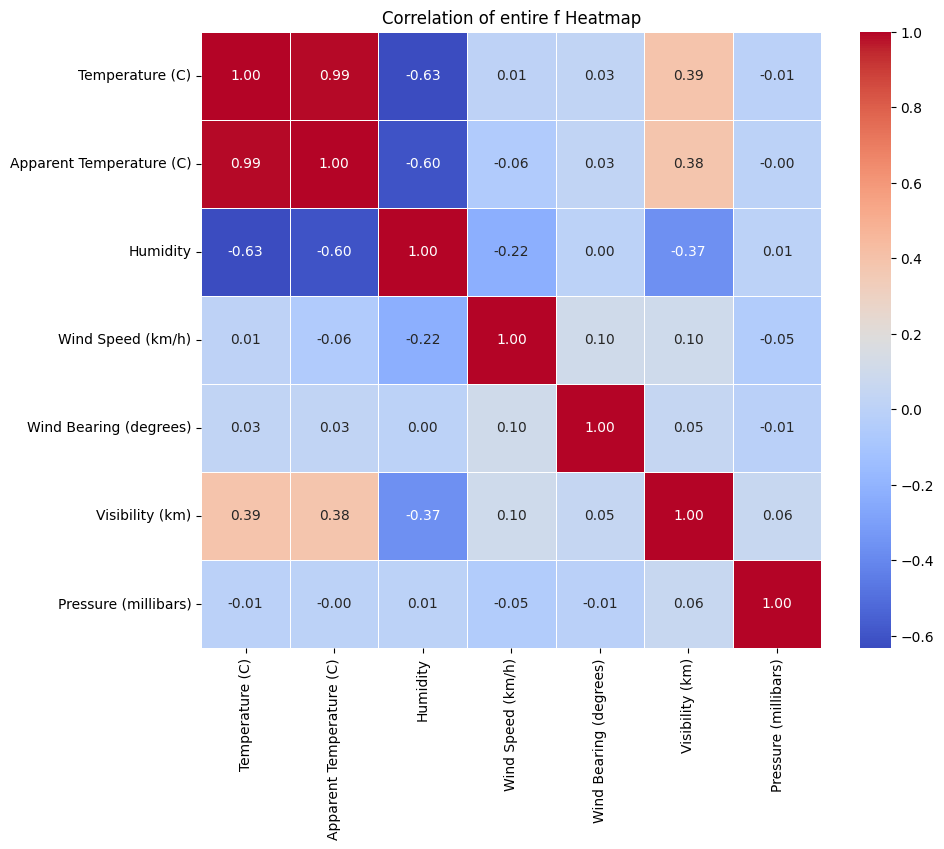

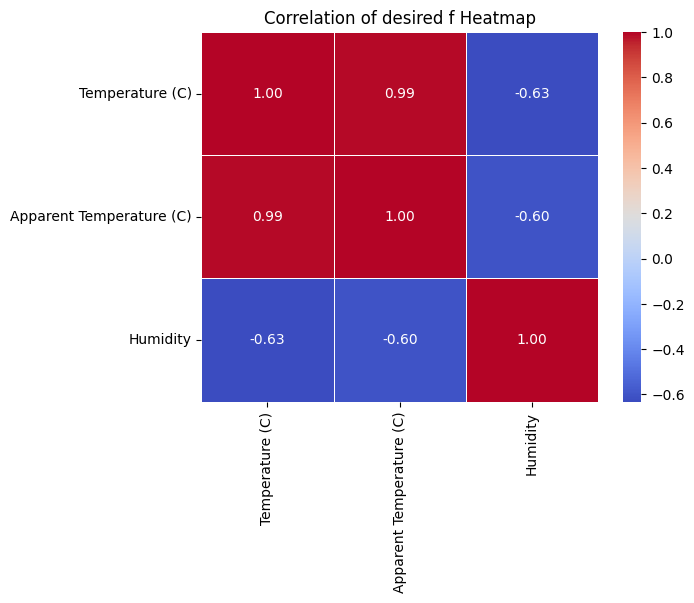

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_drop.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of entire f Heatmap')
plt.show()

sns.heatmap(df_drop[[ 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of desired f Heatmap')
plt.show()


### Histogram


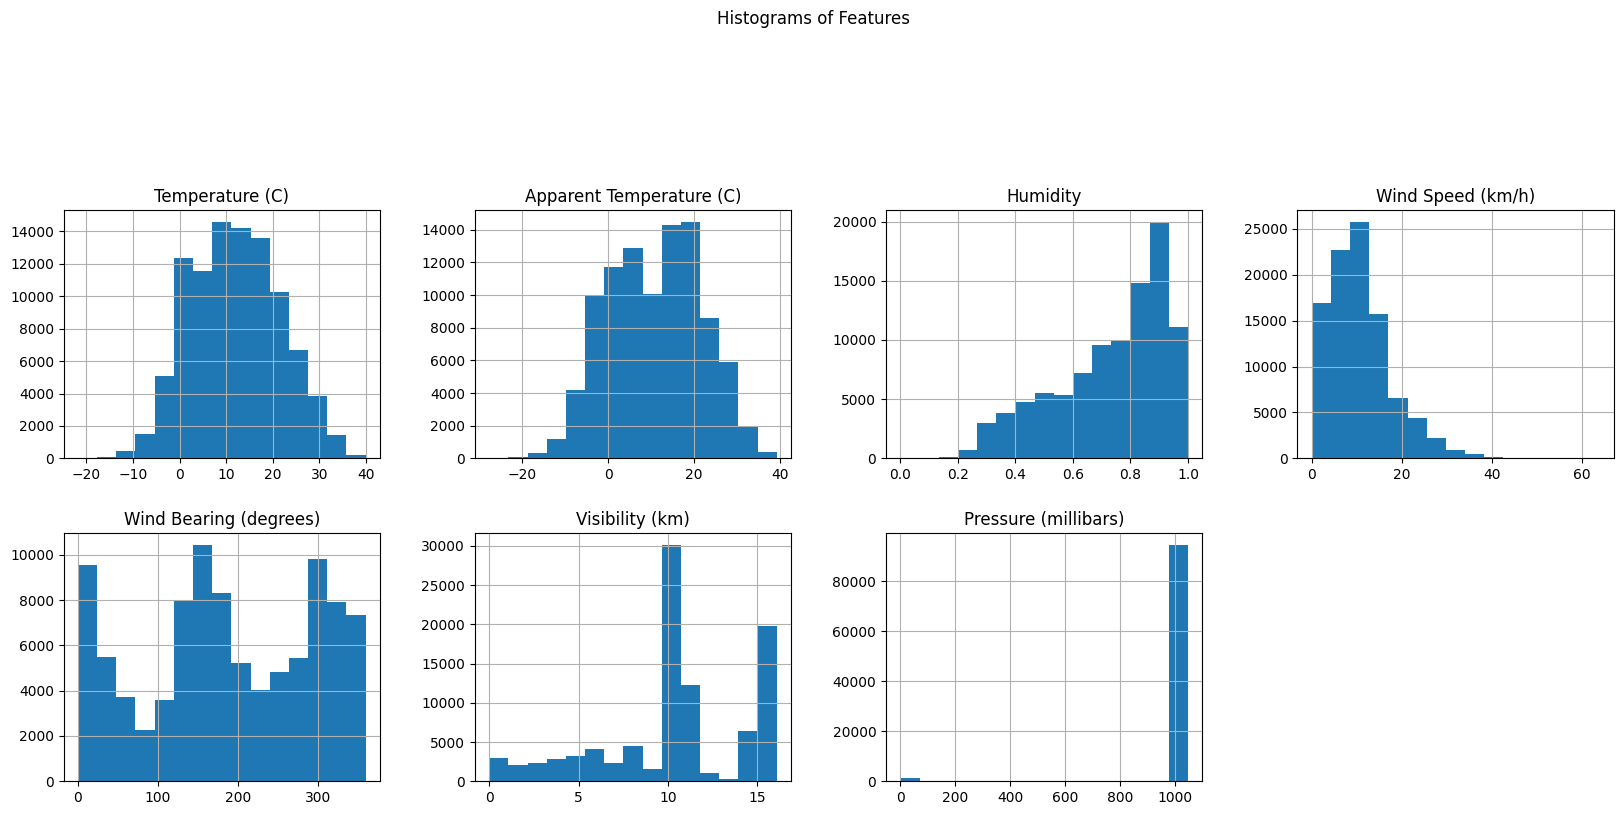

In [8]:
df_drop.hist(bins=15, figsize=(20, 20), layout=(5, 4))
plt.suptitle('Histograms of Features')
plt.show()


### D

In [53]:

X_T = df_drop[[ 'Apparent Temperature (C)', 'Humidity','Visibility (km)']]
y_T =df_drop[[ 'Temperature (C)']]

X_AT = df_drop[[ 'Temperature (C)', 'Humidity','Visibility (km)']]
y_AT =df_drop[[ 'Apparent Temperature (C)']]





### Standardization

In [52]:
# Feature sets
X_T = df_drop[['Apparent Temperature (C)', 'Humidity', 'Visibility (km)']]
y_T = df_drop[['Temperature (C)']]

X_AT = df_drop[['Temperature (C)', 'Humidity', 'Visibility (km)']]
y_AT = df_drop[['Apparent Temperature (C)']]

# Create a scaler object
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform the features
X_T_scaled = scaler_X.fit_transform(X_T)
y_T_scaled = scaler_y.fit_transform(y_T)

X_AT_scaled = scaler_X.fit_transform(X_AT)
y_AT_scaled = scaler_y.fit_transform(y_AT)

# Converting scaled arrays back to DataFrame for better handling and visualization
X_T_scaled = pd.DataFrame(X_T_scaled, columns=X_T.columns)
y_T_scaled = pd.DataFrame(y_T_scaled, columns=y_T.columns)

X_AT_scaled = pd.DataFrame(X_AT_scaled, columns=X_AT.columns)
y_AT_scaled = pd.DataFrame(y_AT_scaled, columns=y_AT.columns)

#### test train split

In [49]:
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(X_T_scaled, y_T_scaled, test_size=0.3, random_state=24)

X_AT_train, X_AT_test, y_AT_train, y_AT_test = train_test_split(X_AT_scaled, y_AT_scaled, test_size=0.3, random_state=24)



### LS & RLS

In [54]:

# Create models for Temperature prediction
model_ols_T = LinearRegression()
model_ridge_T = Ridge(alpha=0.1)  # alpha can be tuned based on validation

# Fitting the models on the training set for Temperature
model_ols_T.fit(X_T_train, y_T_train)
model_ridge_T.fit(X_T_train, y_T_train)

# Predicting on the testing set for Temperature
predictions_ols_T_test = model_ols_T.predict(X_T_test)
predictions_ridge_T_test = model_ridge_T.predict(X_T_test)

# Calculate MSE for Temperature models
mse_ols_T = mean_squared_error(y_T_test, predictions_ols_T_test)
mse_ridge_T = mean_squared_error(y_T_test, predictions_ridge_T_test)

# Create models for Apparent Temperature prediction
model_ols_AT = LinearRegression()
model_ridge_AT = Ridge(alpha=0.1)  # consistent alpha for fair comparison

# Fitting the models on the training set for Apparent Temperature
model_ols_AT.fit(X_AT_train, y_AT_train)
model_ridge_AT.fit(X_AT_train, y_AT_train)

# Predicting on the testing set for Apparent Temperature
predictions_ols_AT_test = model_ols_AT.predict(X_AT_test)
predictions_ridge_AT_test = model_ridge_AT.predict(X_AT_test)

# Calculate MSE for Apparent Temperature models
mse_ols_AT = mean_squared_error(y_AT_test, predictions_ols_AT_test)
mse_ridge_AT = mean_squared_error(y_AT_test, predictions_ridge_AT_test)

# Output results
print("Temperature Prediction MSE - Ordinary Least Squares:", mse_ols_T)
print("Temperature Prediction MSE - Ridge Regression:", mse_ridge_T)
print("Apparent Temperature Prediction MSE - Ordinary Least Squares:", mse_ols_AT)
print("Apparent Temperature Prediction MSE - Ridge Regression:", mse_ridge_AT)


Temperature Prediction MSE - Ordinary Least Squares: 0.012878511126006584
Temperature Prediction MSE - Ridge Regression: 0.012878516411735964
Apparent Temperature Prediction MSE - Ordinary Least Squares: 0.01366766236379614
Apparent Temperature Prediction MSE - Ridge Regression: 0.013667655057284438


### PLots

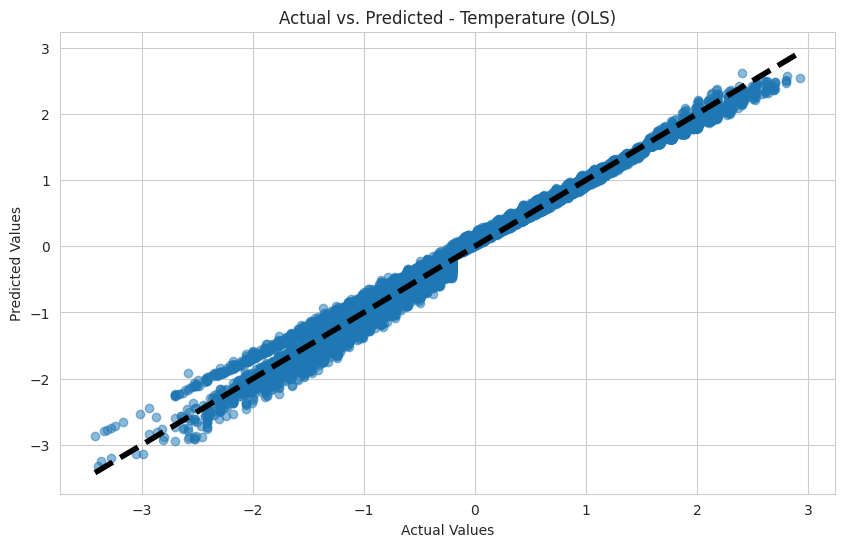

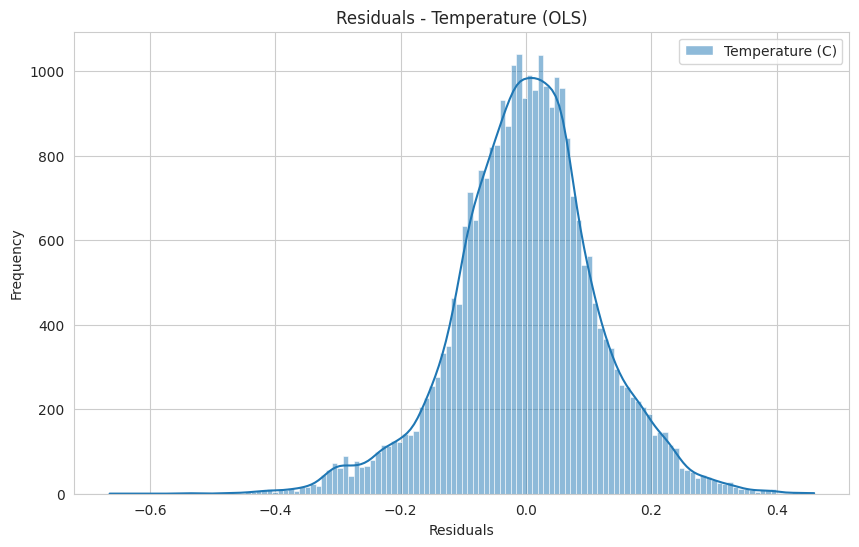

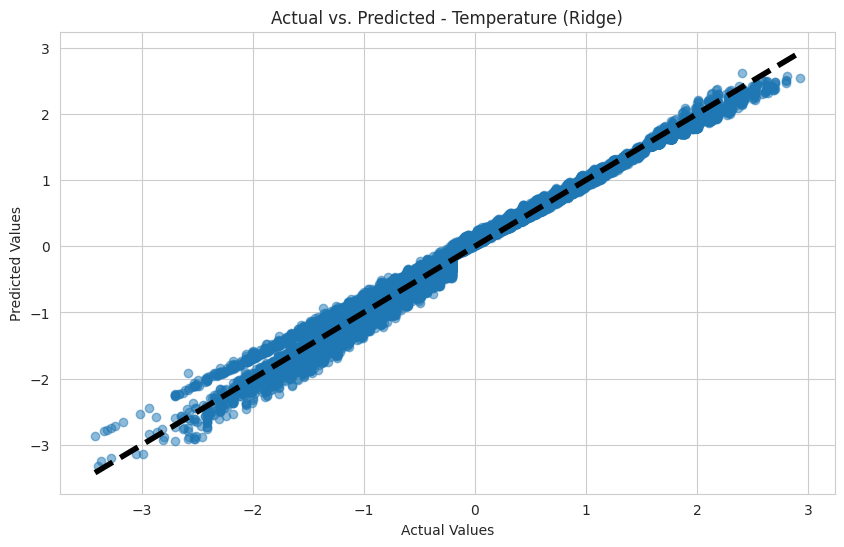

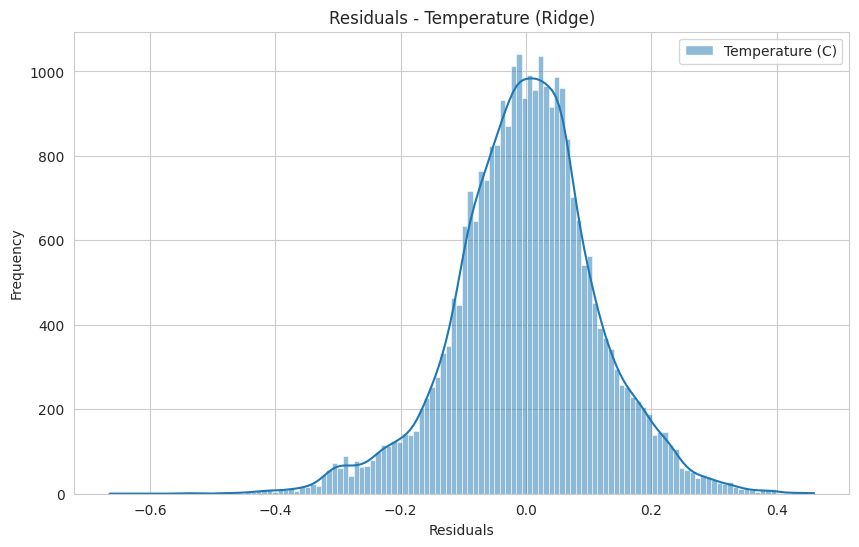

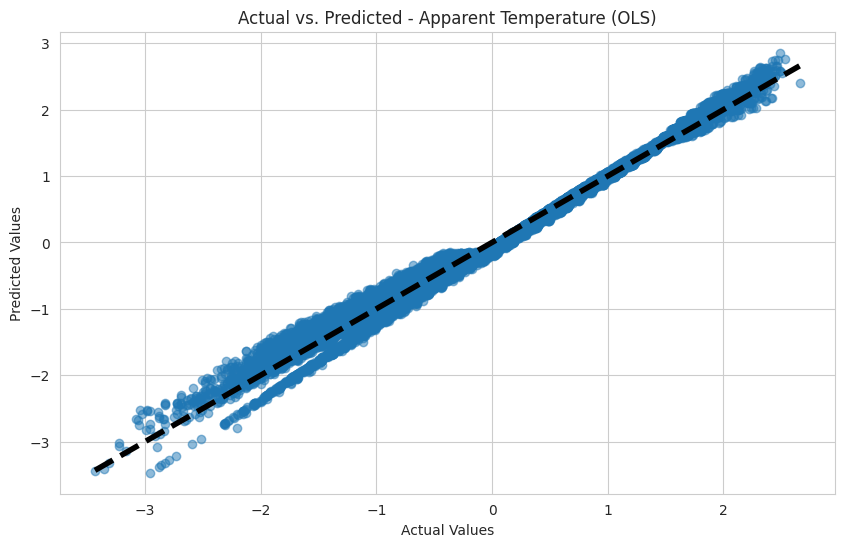

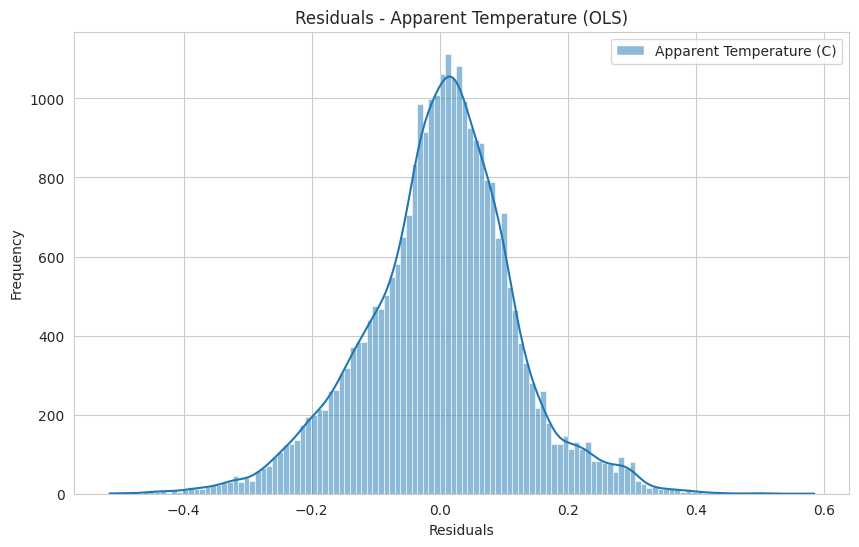

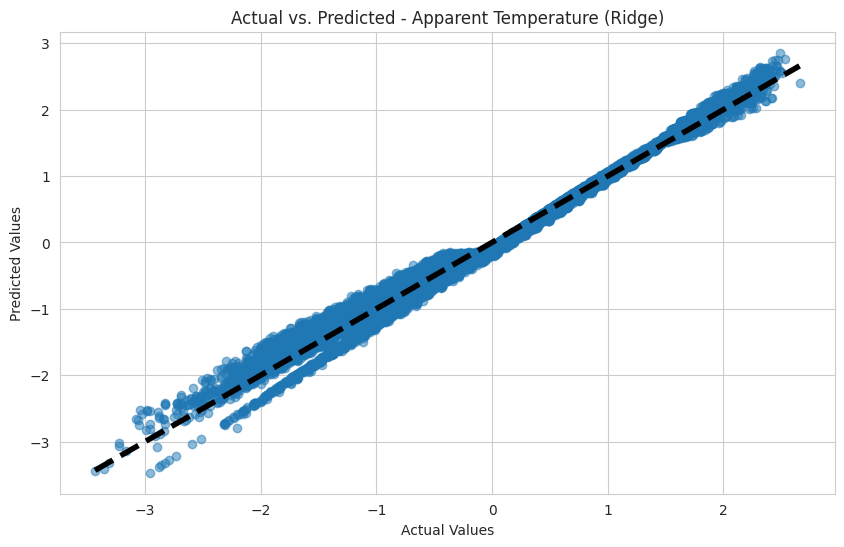

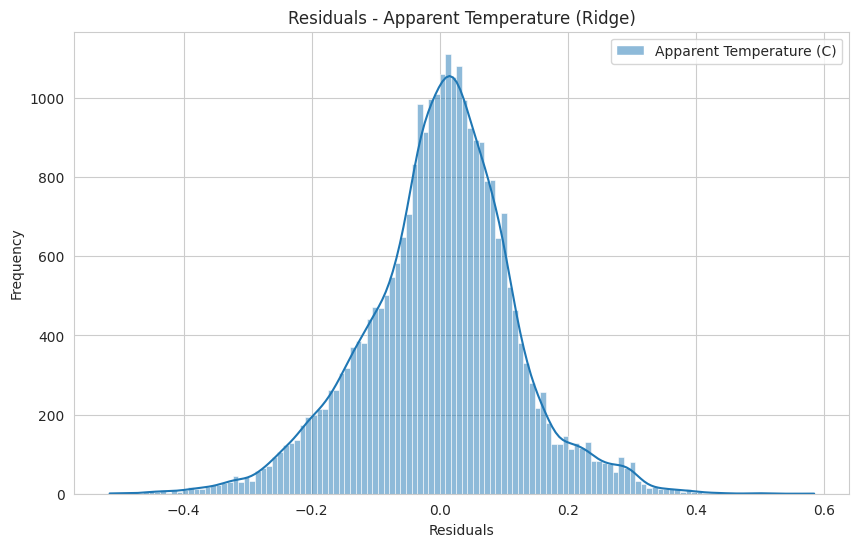

In [58]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Function to create plots
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)  # Diagonal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.show()

def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Plotting for Temperature predictions
plot_predictions(y_T_test, predictions_ols_T_test, 'Actual vs. Predicted - Temperature (OLS)')
plot_residuals(y_T_test, predictions_ols_T_test, 'Residuals - Temperature (OLS)')

plot_predictions(y_T_test, predictions_ridge_T_test, 'Actual vs. Predicted - Temperature (Ridge)')
plot_residuals(y_T_test, predictions_ridge_T_test, 'Residuals - Temperature (Ridge)')

# Plotting for Apparent Temperature predictions
plot_predictions(y_AT_test, predictions_ols_AT_test, 'Actual vs. Predicted - Apparent Temperature (OLS)')
plot_residuals(y_AT_test, predictions_ols_AT_test, 'Residuals - Apparent Temperature (OLS)')

plot_predictions(y_AT_test, predictions_ridge_AT_test, 'Actual vs. Predicted - Apparent Temperature (Ridge)')
plot_residuals(y_AT_test, predictions_ridge_AT_test, 'Residuals - Apparent Temperature (Ridge)')


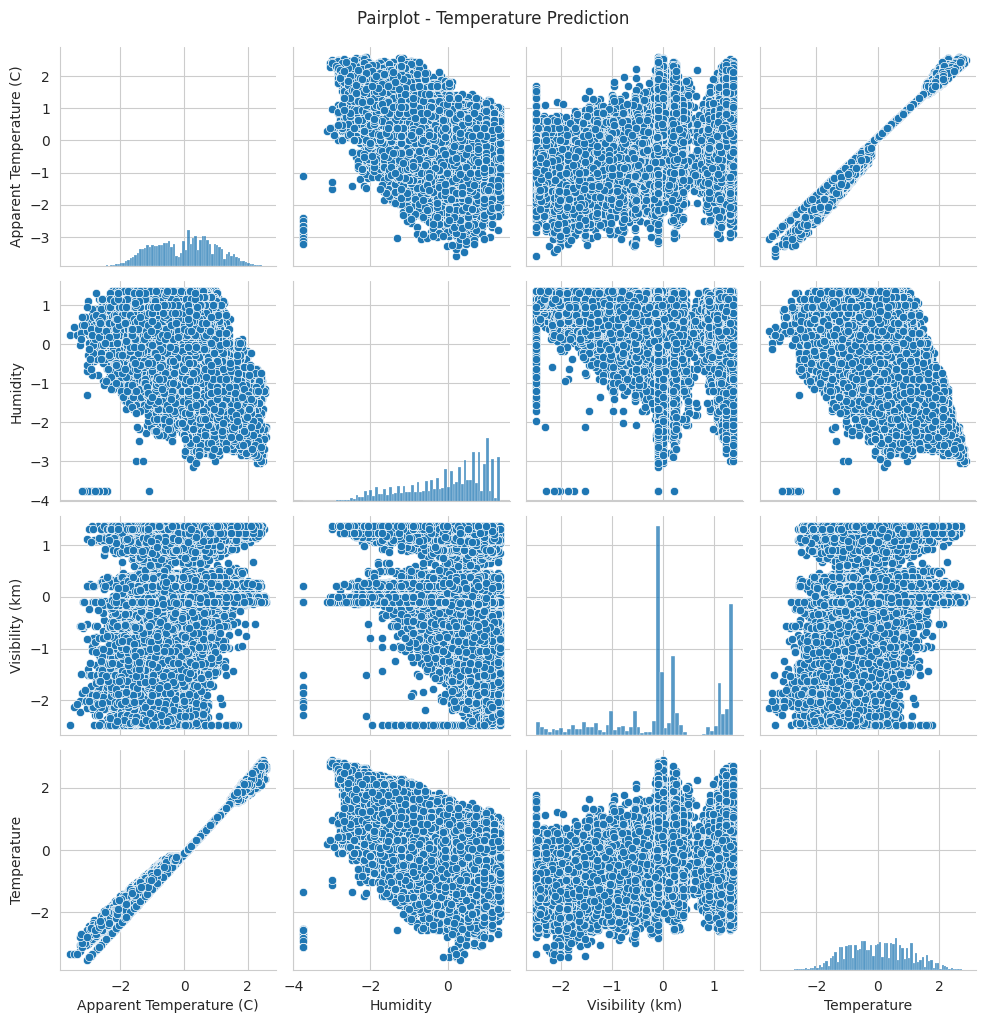

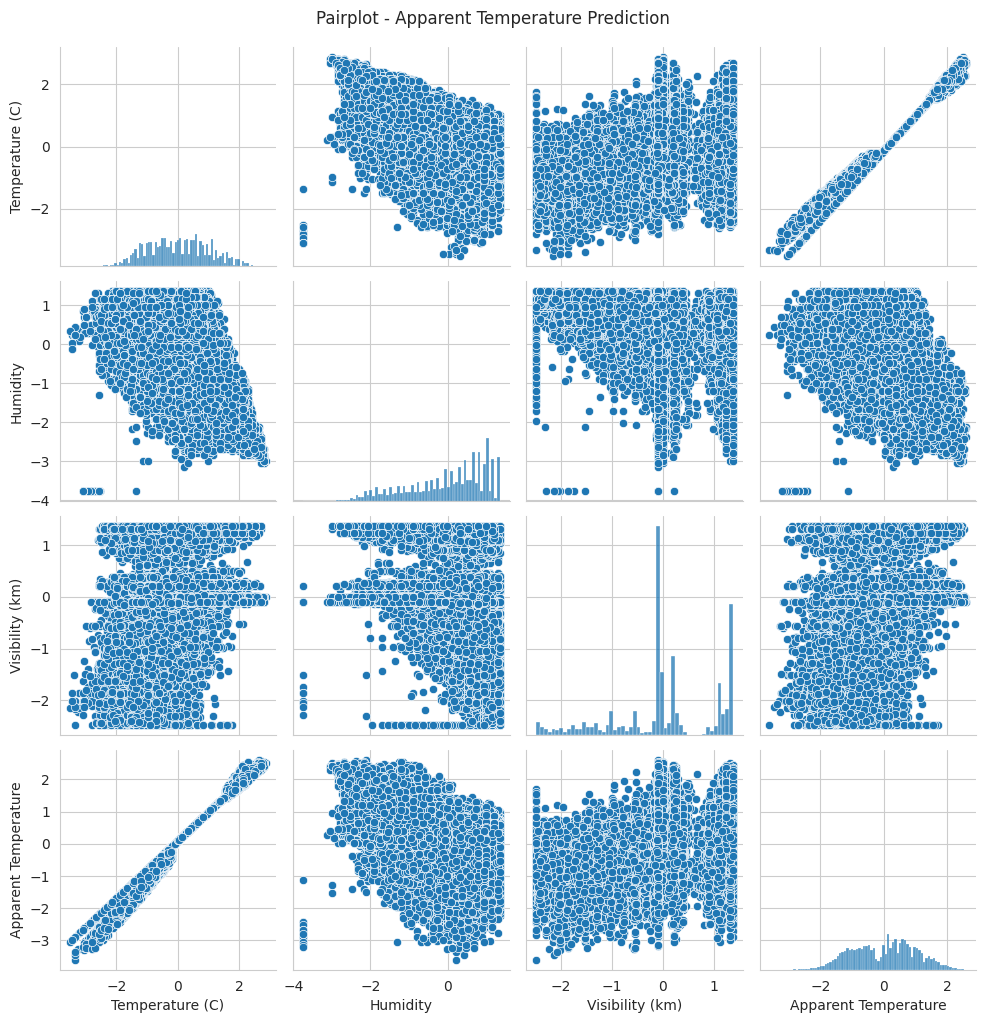

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X_T_train and y_T_train into a single DataFrame
train_data_T = X_T_train.copy()
train_data_T['Temperature'] = y_T_train

# Combine X_AT_train and y_AT_train into a single DataFrame
train_data_AT = X_AT_train.copy()
train_data_AT['Apparent Temperature'] = y_AT_train

# Plot pairplot for Temperature prediction
sns.pairplot(train_data_T)
plt.suptitle('Pairplot - Temperature Prediction', y=1.02)
plt.show()

# Plot pairplot for Apparent Temperature prediction
sns.pairplot(train_data_AT)
plt.suptitle('Pairplot - Apparent Temperature Prediction', y=1.02)
plt.show()


## WLS

In [62]:


#
weights_T = 1 / (1 + 0.1*df_drop['Humidity'])
weights_AT = 1 / (1 + 0.1*df_drop['Visibility (km)'])

# Apply these weights to training datasets (ensure you have the correct weights aligned with your training sets)
weights_T_train = weights_T.iloc[X_T_train.index]  # Adjust train_indices according to how you've split your data
weights_AT_train = weights_AT.iloc[X_AT_train.index]  # Adjust train_indices according to how you've split your data

# Create weighted LS models for Temperature
model_wls_T = LinearRegression()
model_wls_T.fit(X_T_train, y_T_train, sample_weight=weights_T_train)

# Predicting on the testing set for Temperature
predictions_wls_T_test = model_wls_T.predict(X_T_test)

# Calculate MSE for Temperature model using WLS
mse_wls_T = mean_squared_error(y_T_test, predictions_wls_T_test)

# Create weighted LS models for Apparent Temperature
model_wls_AT = LinearRegression()
model_wls_AT.fit(X_AT_train, y_AT_train, sample_weight=weights_AT_train)

# Predicting on the testing set for Apparent Temperature
predictions_wls_AT_test = model_wls_AT.predict(X_AT_test)

# Calculate MSE for Apparent Temperature model using WLS
mse_wls_AT = mean_squared_error(y_AT_test, predictions_wls_AT_test)

# Output results
print("Temperature Prediction MSE - Weighted Least Squares:", mse_wls_T)
print("Apparent Temperature Prediction MSE - Weighted Least Squares:", mse_wls_AT)


Temperature Prediction MSE - Weighted Least Squares: 0.012876949037476607
Apparent Temperature Prediction MSE - Weighted Least Squares: 0.013684055553901182


### plots

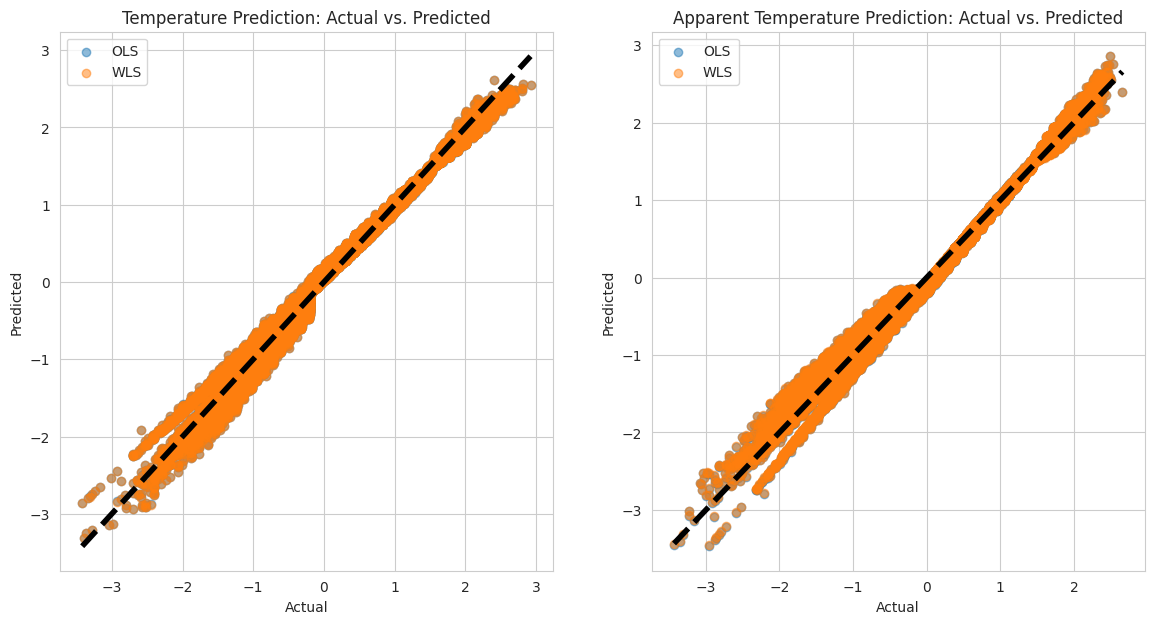

In [60]:
import matplotlib.pyplot as plt

# Scatter plot for Temperature Predictions
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_T_test, predictions_ols_T_test, alpha=0.5, label='OLS')
plt.scatter(y_T_test, predictions_wls_T_test, alpha=0.5, label='WLS')
plt.plot([y_T_test.min(), y_T_test.max()], [y_T_test.min(), y_T_test.max()], 'k--', lw=4)
plt.title('Temperature Prediction: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Scatter plot for Apparent Temperature Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_AT_test, predictions_ols_AT_test, alpha=0.5, label='OLS')
plt.scatter(y_AT_test, predictions_wls_AT_test, alpha=0.5, label='WLS')
plt.plot([y_AT_test.min(), y_AT_test.max()], [y_AT_test.min(), y_AT_test.max()], 'k--', lw=4)
plt.title('Apparent Temperature Prediction: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.show()


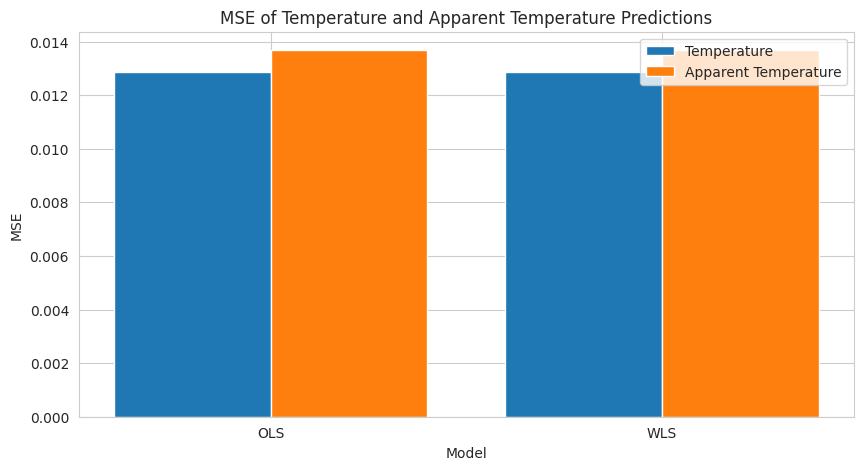

In [61]:
# Data to plot
labels = ['OLS', 'WLS']
mse_values_T = [mse_ols_T, mse_wls_T]
mse_values_AT = [mse_ols_AT, mse_wls_AT]

x = range(len(labels))  # the label locations

# Creating the bar plot
plt.figure(figsize=(10, 5))

plt.bar(x, mse_values_T, width=0.4, label='Temperature', align='center')
plt.bar([p + 0.4 for p in x], mse_values_AT, width=0.4, label='Apparent Temperature', align='center')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of Temperature and Apparent Temperature Predictions')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()

plt.show()
